In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy import stats

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [4]:
# Convert to DataFrame for better visualization
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['target'] = y

In [5]:
print("First 5 rows of the dataset:")
print(iris_df.head())

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [6]:
print("\nSummary statistics:")
print(iris_df.describe())


Summary statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [8]:
sns.pairplot(iris_df, hue='target', palette='Set1', markers=["o", "s", "D"],height=2)
plt.show()

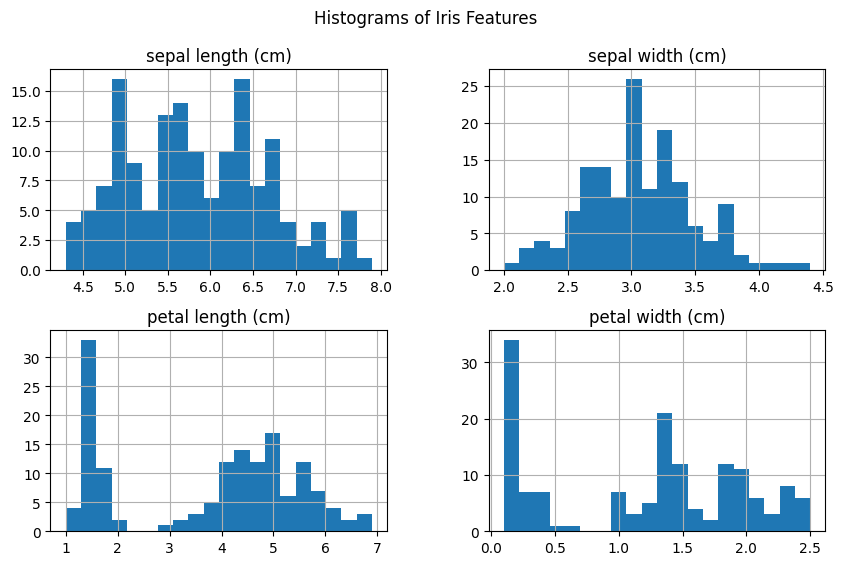

In [9]:
iris_df.drop(columns='target').hist(bins=20, figsize=(10, 6))
plt.suptitle('Histograms of Iris Features')
plt.show()

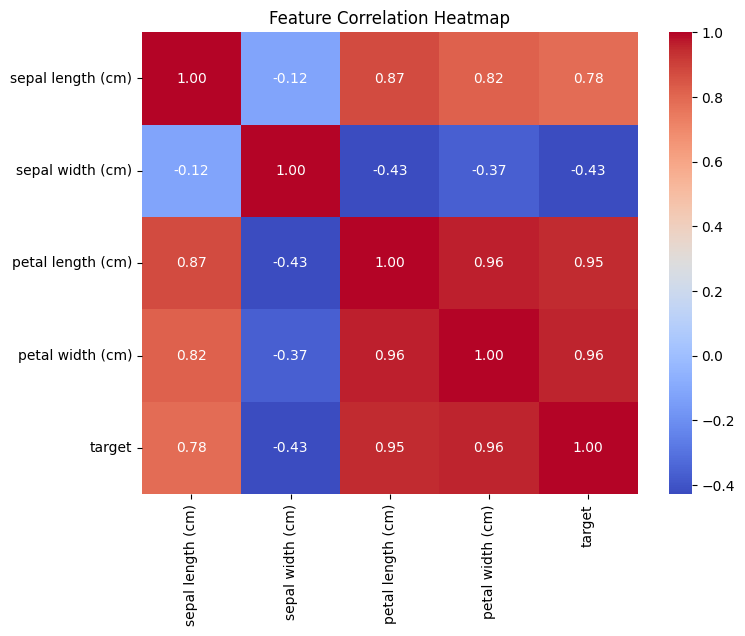

In [10]:
correlation_matrix = iris_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

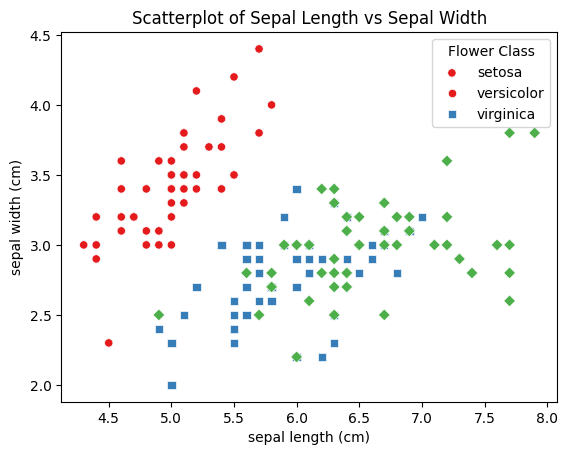

In [20]:
# Scatterplot for the first two features (sepal length and sepal width) and color-coded by class
sns.scatterplot(x=iris_df.iloc[:, 0], y=iris_df.iloc[:, 1], hue='target', palette='Set1', style='target', data=iris_df, markers=["o", "s", "D"])
plt.title("Scatterplot of Sepal Length vs Sepal Width")
plt.xlabel(iris.feature_names[0])  # Sepal length
plt.ylabel(iris.feature_names[1])  # Sepal width
plt.legend(title='Flower Class', labels=iris.target_names)
plt.show()

In [21]:
z_scores = np.abs(stats.zscore(iris_df.drop(columns=['target'])))
outliers = (z_scores > 3).any(axis=1)
print("\nNumber of outliers detected:", np.sum(outliers))
print("\nOutlier rows:")
print(iris_df[outliers])


Number of outliers detected: 1

Outlier rows:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
15                5.7               4.4                1.5               0.4   

    target  
15       0  


In [13]:
iris_df_cleaned = iris_df[~outliers]
X_cleaned = iris_df_cleaned.drop(columns=['target']).values
y_cleaned = iris_df_cleaned['target'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.3, random_state=42, stratify=y_cleaned)

(45, 4)

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # RBF kernel is commonly used
svm_model.fit(X_train, y_train)

SVC()

In [25]:
y_pred = svm_model.predict(X_test)

In [26]:
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9111111111111111

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.88        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45


Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]


In [28]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()